In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split


#정확도 측정 Method
def accuracy(X,Y,S):
    total = len(X)
    count = 0
    for i in range(1,len(X)):
      if(X[i] == Y[i]):
        count = count+1
    print(S,'정확도는 ',round(count/total,4)*100,'% 입니다')
    
#시각화 Method
def visualization(model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    #코드 출처: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

#Iris Data 불러오기
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
train_x, test_x, train_y ,test_y = train_test_split(X,Y, test_size = 0.3, random_state=0)

Train  정확도는  82.86 % 입니다
Test  정확도는  80.0 % 입니다


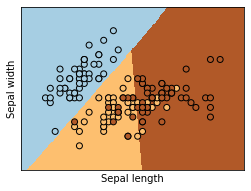

In [2]:
#Logistic Regression
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(train_x, train_y)
#Traing 정확도
accuracy(train_y,logreg.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,logreg.predict(test_x),'Test ')
#시각화
visualization(logreg)

Train  정확도는  81.89999999999999 % 입니다
Test  정확도는  66.67 % 입니다


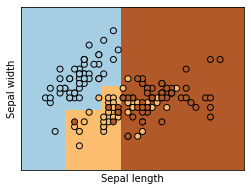

In [3]:
#Decision Tree
import pydotplus
from sklearn import tree

DecisionTree = tree.DecisionTreeClassifier(criterion= "entropy", max_depth=3)
DecisionTree.fit(train_x, train_y)

#Traing 정확도
accuracy(train_y,DecisionTree.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,DecisionTree.predict(test_x),'Test ')

#시각화
visualization(DecisionTree)

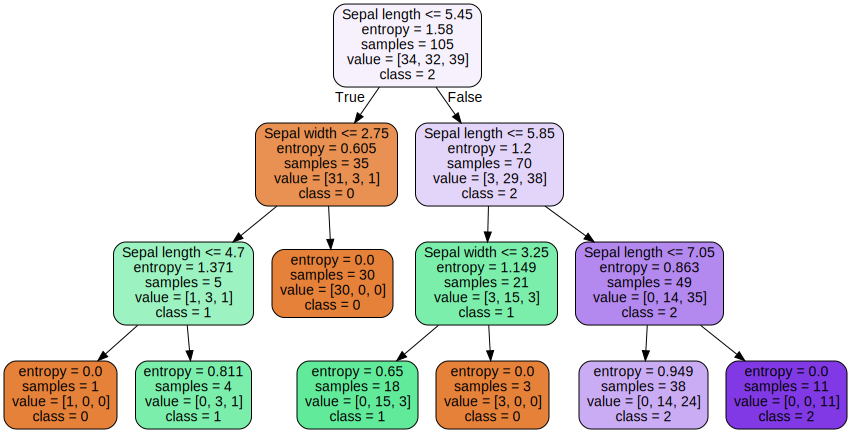

In [4]:
#Decision Treee 시각화
from matplotlib.pyplot import imread
import graphviz

label_names=['Sepal length','Sepal width']
dot_data = tree.export_graphviz(DecisionTree, feature_names=label_names,
                                out_file='tree.dot',class_names=["0","1","2"], filled=True, rounded=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

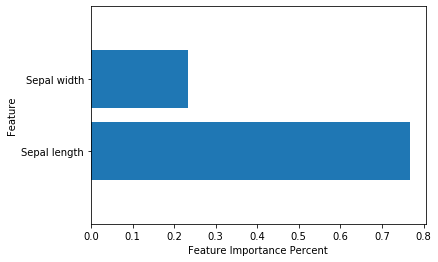

In [5]:
#Decision Treee 중요도 시각화
def plot_feature_importances(model):
    plt.barh(range(2), model.feature_importances_, align='center')
    plt.yticks(np.arange(2), ['Sepal length','Sepal width'])
    plt.xlabel("Feature Importance Percent")
    plt.ylabel("Feature")
    plt.ylim(-1, 2)

plot_feature_importances(DecisionTree)

Train  정확도는  91.43 % 입니다
Test  정확도는  66.67 % 입니다


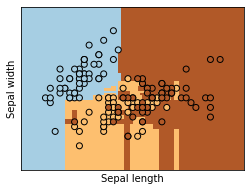

In [6]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion = "entropy", n_estimators=10)
RandomForest.fit(train_x, train_y)

#Traing 정확도
accuracy(train_y,RandomForest.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,RandomForest.predict(test_x),'Test ')
#시각화
visualization(RandomForest)

Train  정확도는  80.0 % 입니다
Test  정확도는  80.0 % 입니다


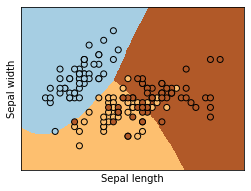

In [7]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB().fit(train_x, train_y)
#Traing 정확도
accuracy(train_y,NaiveBayes.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,NaiveBayes.predict(test_x),'Test ')
#시각화
visualization(NaiveBayes)

Train  정확도는  73.33 % 입니다
Test  정확도는  53.33 % 입니다


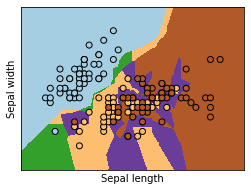

In [13]:
#K-NN
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 2, n_jobs = -1)
# n_jobs = -1 : "직접 판단하라는 의미"
KNN.fit(train_x, train_y)
#Traing 정확도
accuracy(train_y,KNN.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,KNN.predict(test_x),'Test ')
#시각화
visualization(KNN)

Train  정확도는  80.95 % 입니다
Test  정확도는  80.0 % 입니다


C:\Tensor\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


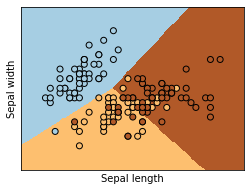

In [14]:
#SVM
from sklearn import svm
SVM = svm.LinearSVC(C=10)
SVM.fit(train_x, train_y)

#Traing 정확도
accuracy(train_y,SVM.predict(train_x),'Train ')
#Test 정확도
accuracy(test_y,SVM.predict(test_x),'Test ')
#시각화
visualization(SVM)